In [1]:
!pip install xlrd

import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

    100% |████████████████████████████████| 112kB 4.4MB/s 


In [2]:
# upload file
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
         name=fn, length=len(uploaded[fn])))

Saving Share Externally Sample Data Set.xlsx to Share Externally Sample Data Set.xlsx
User uploaded file "Share Externally Sample Data Set.xlsx" with length 7892198 bytes


In [3]:
#Load dataset
#datafile = os.path.join(fn)
df = pd.read_excel(fn, header = 1)
df.convert_objects(convert_numeric=True).dtypes
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,Customer ID,TransactionID,Column-1,Column-2,Column-3,Column-4,Column-5,Column-6,Column-7,Column-8,Column-9,Column-10,Column-11,Column-12,Column-13,Approved transactions,fraud_indicator,chargeback_indicator
0,ID000001,20170809152802M189CG2971240,XXX,AAA,10,NaN,3 years,10,10.0,NaN,3 years,0,NaN,Apple,iPhone7Plus,0,NaN,NaN
1,ID000002,20170818213114M189CG9136646,YYY,AAA,na,NaN,NaN,na,NaN,Apr-24-2015,na,na,NaN,NaN,NaN,0,NaN,NaN
2,ID000003,20170816002739X177CG8816137,ZZZ,AAA,10,10.0,3 years,10,10.0,NaN,3 years,na,NaN,Samsung,Galaxy S8+,0,NaN,NaN
3,ID000004,20170812013147X189CG9214661,UUU,AAA,10,10.0,1 year,10,NaN,Jun-30-2016,1 year,na,NaN,OBERTHUR TECHNOLOGIES,OBR LTEGSM REM 4FF CSIMV2,1,1.0,0.0
4,ID000004,20170813032904M185CG7230870,UUU,AAA,10,10.0,1 year,10,NaN,Jun-30-2016,1 year,na,NaN,OBERTHUR TECHNOLOGIES,OBR LTEGSM REM 4FF CSIMV2,0,NaN,NaN


In [4]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_').str.replace('(', '').str.replace(')', '')

df.fraud_indicator        = df.fraud_indicator.astype(float); #.fillna(0.0)
df.chargeback_indicator   = df.chargeback_indicator.astype(float); #.fillna(0.0); 

df.Column_1  = df.Column_1.astype('category')
df.Column_2  = df.Column_2.astype('category')
df.Column_3  = df.Column_3.astype('category')
df.Column_4  = df.Column_4.astype('category')
df.Column_5  = df.Column_5.astype('category')
df.Column_6  = df.Column_6.astype('category')
df.Column_7  = df.Column_7.astype('category')
df.Column_8  = df.Column_8.astype('category')
df.Column_9  = df.Column_9.astype('category')
df.Column_10 = df.Column_10.astype('category')
df.Column_11 = df.Column_11.astype('category')
df.Column_12 = df.Column_12.astype('category')
df.Column_13 = df.Column_13.astype('category')


# Generates descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset’s distribution
df.describe()

,Approved_transactions,fraud_indicator,chargeback_indicator
count,88596.000000,2739.0,2739.000000
mean,0.458136,1.0,0.363271
std,0.498247,0.0,0.481030
min,0.000000,1.0,0.000000
25%,0.000000,1.0,0.000000
50%,0.000000,1.0,0.000000
75%,1.000000,1.0,1.000000
max,1.000000,1.0,1.000000


1.0    2739
Name: fraud_indicator, dtype: int64 
 0.0    1744
1.0     995
Name: chargeback_indicator, dtype: int64


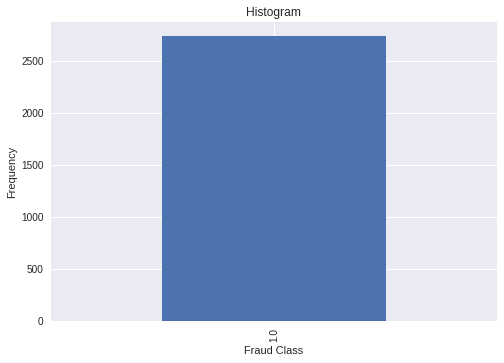

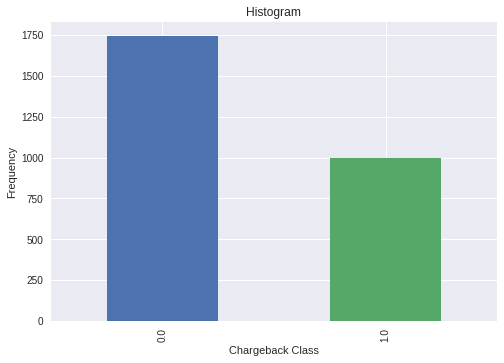

In [5]:

fraud_count       = pd.value_counts(df['fraud_indicator'], sort = True).sort_index()
chargeback_count  = pd.value_counts(df['chargeback_indicator'], sort = True).sort_index()

fraud_count.plot(kind = 'bar', label='fraud', legend=False)

print(fraud_count, "\n", chargeback_count)

# 3% ~ 2.35σ
plt.title("Histogram")
plt.ylabel("Frequency")
plt.xlabel("Fraud Class")
plt.show()

# 1% ~ 2.6 σ
chargeback_count.plot(kind = 'bar', label='charge back', legend=False)
plt.title("Histogram")
plt.ylabel("Frequency")
plt.xlabel("Chargeback Class")
plt.show()

In [62]:
df1  = df[['Column_1', 'Column_2', 'Column_3', 'Column_4', 'Column_5', 'Column_6', 
           'Column_7', 'Column_8',	'Column_9',	'Column_10',	'Column_11', 'Column_12', 
           'Column_13', 'Approved_transactions',	'fraud_indicator',	'chargeback_indicator']]
df1.Column_1 = df1.Column_1.cat.codes.astype('int64')
df1.Column_2 = df1.Column_2.cat.codes.astype('int64')
df1.Column_3 = df1.Column_3.cat.codes.astype('int64')
df1.Column_4 = df1.Column_4.cat.codes.astype('int64')
df1.Column_5 = df1.Column_5.cat.codes.astype('int64')
df1.Column_6 = df1.Column_6.cat.codes.astype('int64')
df1.Column_7 = df1.Column_7.cat.codes.astype('int64')
df1.Column_8 = df1.Column_8.cat.codes.astype('int64')
df1.Column_9 = df1.Column_9.cat.codes.astype('int64')
df1.Column_10 = df1.Column_10.cat.codes.astype('int64')
df1.Column_11 = df1.Column_11.cat.codes.astype('int64')
df1.Column_12 = df1.Column_12.cat.codes.astype('int64')
df1.Column_13 = df1.Column_13.cat.codes.astype('int64')


dataset = tf.contrib.learn.extract_pandas_data(df1)
np.random.shuffle(dataset)

print('Total dataset :',  dataset.shape)

pd.DataFrame(dataset).describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Total dataset : (88596, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,88596.000000,88596.000000,88596.000000,88596.000000,88596.000000,88596.000000,88596.000000,88596.000000,88596.000000,88596.000000,88596.000000,88596.000000,88596.000000,88596.000000,2739.0,2739.000000
mean,8.537699,0.000666,2.074292,0.093514,11.028489,1.006885,0.265621,89.441713,20.379148,0.913427,-0.601145,29.244706,880.289686,0.458136,1.0,0.363271
std,1.315182,0.042358,0.407573,0.828265,11.716055,0.484698,0.936665,238.601500,11.551536,1.004926,0.758187,37.524081,648.251877,0.498247,0.0,0.481030
min,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.0,0.000000
25%,8.000000,0.000000,2.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,7.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.0,0.000000
50%,9.000000,0.000000,2.000000,0.000000,5.000000,1.000000,1.000000,-1.000000,25.000000,0.000000,-1.000000,12.000000,999.000000,0.000000,1.0,0.000000
75%,10.000000,0.000000,2.000000,1.000000,24.000000,1.000000,1.000000,-1.000000,30.000000,2.000000,-1.000000,51.000000,1551.000000,1.000000,1.0,1.000000
max,10.000000,3.000000,3.000000,1.000000,30.000000,2.000000,1.000000,1115.000000,33.000000,2.000000,1.000000,130.000000,1585.000000,1.000000,1.0,1.000000


# Anomaly Detection (AD)


We use a Density-Based Anomaly Detection algorithm. This algorithm assumes that normal data points occur around a dense neighborhood and abnormalities are far away. It finds μ (mean) and σ (standard deviation) of each feature in the set. These μ (mean) and σ (standard deviation) is used to compute probability for each sample. These probabilities are collected for every sample in the dataset to find local outlier factor (LOF).

Samples with probabilities lower than LOF are marked with fraud class.



In [8]:
def gauss_prob(x, mu, sigma):
    root_2pi = np.sqrt(2*np.pi)
    sz = len(x)
    pf = [None]*sz
    for i in range(sz):
        pf[i] = np.exp(- (x[i]-mu[i])**2 / (2*sigma[i]**2) ) / (root_2pi*sigma[i])
    return pf

feature_sz    = dataset.shape[1]-2;
feature_mu    = [None]*feature_sz;
feature_sigma = [None]*feature_sz;
for fi in range(feature_sz):
    feature_mu[fi]    = np.mean(dataset[:,fi])
    feature_sigma[fi] = np.std(dataset[:,fi])

print(feature_mu)
print(feature_sigma)

dataset_sz   = dataset.shape[0]
dataset_prob = np.empty([dataset_sz, feature_sz], dtype=float)
fraud_prob   = []
for i in range(dataset_sz):
    dataset_prob[i] = gauss_prob(dataset[i][:feature_sz], feature_mu, feature_sigma)
    #if ( dataset_prob[i] < 0.001 ):
    fraud_prob.append(dataset_prob[i])

lof_epsilon = np.std(fraud_prob)

[8.537699218926363, 0.0006659442864237663, 2.0742922931057834, 0.09351437988171024, 11.028488870829383, 1.006885186690144, 0.2656214727527202, 89.44171294415098, 20.37914804280103, 0.9134272427649104, -0.6011445211973453, 29.244706307282495, 880.2896857645943, 0.4581358074856653]
[1.315174517189251, 0.04235823336923947, 0.40757046755339243, 0.8282605547507695, 11.715988743205315, 0.4846951027090882, 0.9366601683653427, 238.6001532674641, 11.551471222513547, 1.0049203241635198, 0.7581829242501918, 37.523868841663734, 648.2482189367904, 0.498244306926956]


In [9]:
print(feature_mu)
print(feature_sigma)
print(lof_epsilon)


[8.537699218926363, 0.0006659442864237663, 2.0742922931057834, 0.09351437988171024, 11.028488870829383, 1.006885186690144, 0.2656214727527202, 89.44171294415098, 20.37914804280103, 0.9134272427649104, -0.6011445211973453, 29.244706307282495, 880.2896857645943, 0.4581358074856653]
[1.315174517189251, 0.04235823336923947, 0.40757046755339243, 0.8282605547507695, 11.715988743205315, 0.4846951027090882, 0.9366601683653427, 238.6001532674641, 11.551471222513547, 1.0049203241635198, 0.7581829242501918, 37.523868841663734, 648.2482189367904, 0.498244306926956]
2.3733111156925584


In [10]:

print(dataset_prob.shape)
print(np.mean(dataset_prob))
print(np.std(dataset_prob))
print(np.min(dataset_prob))
print(np.max(dataset_prob))

(88596, 14)
0.9196544358430491
2.3733111156925584
0.0
9.417129751237507


##############################################################
Fraud prediction accuracy = 79.84665936473165
Overall Fraud predictions = 55889
##############################################################


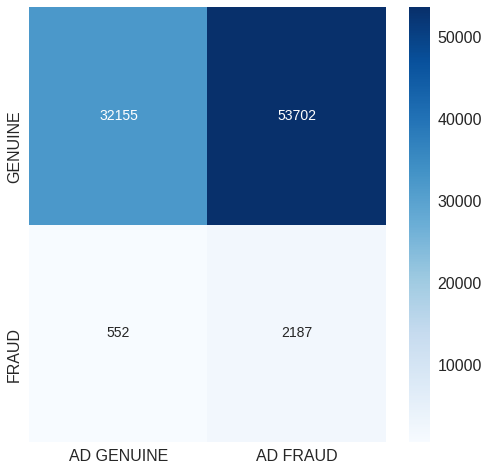

In [56]:
# print('LOF ϵ  :', lof_epsilon)
# print('Dataset: ', np.mean(dataset_prob), np.std(dataset_prob))
# print('Fraud  : ', np.mean(fraud_prob), np.std(fraud_prob))

sess = tf.Session()
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
sess.run(init)

fraud_prediction = np.zeros((dataset_sz),dtype=int)
for s in range(dataset_sz):
  cumulative_feature_distance = 0.0
  for fi in range(feature_sz):
    pct_distance   = feature_mu[fi] - 2.6*feature_sigma[fi]
    sample_distance = feature_mu[fi] - dataset_prob[s][fi]
    if ( sample_distance > pct_distance ):
      cumulative_feature_distance += (sample_distance-pct_distance)/feature_sigma[fi]
  if ( cumulative_feature_distance > 27.1):
    fraud_prediction[s] = 1

# Compare accuracy of label vs preduction
labelled_fraud  = []
predicted_fraud = []
ifraud = dataset.shape[1] -2
for s in range(dataset_sz):
  if (  dataset[s, ifraud] == 0.0 or dataset[s, ifraud] == 1.0 ):
    labelled_fraud.append(dataset[s, ifraud])
    predicted_fraud.append(fraud_prediction[s])


labelled_fraud  = np.array(labelled_fraud)
predicted_fraud = np.array(predicted_fraud)

print("##############################################################")
print("Fraud prediction accuracy =", 100*(predicted_fraud==1.0).sum()/(labelled_fraud==1.0).sum())
print("Overall Fraud predictions =", (fraud_prediction==1.0).sum())
print("##############################################################")
#print(adcm_ary)

adcm = tf.confusion_matrix(dataset[:,ifraud]==1.0, fraud_prediction, num_classes=2)
adcm_ary = adcm.eval(session=sess)

# Plot confusion matrix
df_adcm = pd.DataFrame(adcm_ary, index = [i for i in ['GENUINE', 'FRAUD']], columns = [i for i in ['AD GENUINE', 'AD FRAUD']])
plt.figure(figsize = (8,8))
sn.heatmap(df_adcm, cmap="Blues", annot=True, fmt='d', annot_kws={"size": 14})# font size
sn.set(font_scale=1.6)#for label size
plt.show()

Overall False chargebacks            = 1744
Overall True  chargebacks            = 995
Correct True  chargeback predictions = 780
##############################################################
Overall (True+False) Chargeback prediction accuracy = 40.78130704636729
True chargeback prediction accuracy                 = 78.39195979899498
False chargeback prediction accuracy                = 21.608040201005025
##############################################################


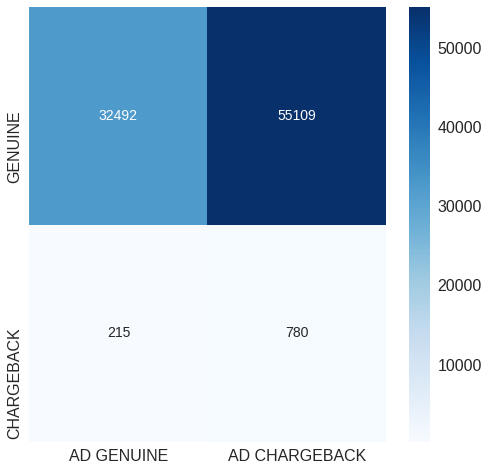

In [59]:
chargeback_prediction = np.zeros((dataset_sz),dtype=int)
for s in range(dataset_sz):
  cumulative_feature_distance = 0.0
  for fi in range(feature_sz):
    pct_distance   = feature_mu[fi] - 2.6*feature_sigma[fi]
    sample_distance = feature_mu[fi] - dataset_prob[s][fi]
    if ( sample_distance > pct_distance ):
      cumulative_feature_distance += (sample_distance-pct_distance)/feature_sigma[fi]
  if ( cumulative_feature_distance > 27.1):
    chargeback_prediction[s] = 1

    
# Compare accuracy of labelled vs preduction
labelled_chargeback  = []
predicted_chargeback = []
icb = dataset.shape[1] -1
for s in range(dataset_sz):
  if (  dataset[s, icb] == 0.0 or dataset[s, icb] == 1.0 ):
    labelled_chargeback.append(dataset[s, icb])
    predicted_chargeback.append(chargeback_prediction[s])


labelled_chargeback  = np.array(labelled_chargeback)
predicted_chargeback = np.array(predicted_chargeback)



print("Overall False chargebacks            =", (labelled_chargeback==0.0).sum())
print("Overall True  chargebacks            =", (labelled_chargeback==1.0).sum())
print("Correct True  chargeback predictions =", (((predicted_chargeback==1.0)&(labelled_chargeback==1.0))==True).sum())

print("##############################################################")
print("Overall (True+False) Chargeback prediction accuracy =", 
      100*((predicted_chargeback==labelled_chargeback)==True).sum() / labelled_chargeback.shape[0] )
print("True chargeback prediction accuracy                 =", 
      100*(((predicted_chargeback==1.0)&(labelled_chargeback==1.0))==True).sum() / (labelled_chargeback==1.0).sum() )
print("False chargeback prediction accuracy                =", 
      100*(((predicted_chargeback==0.0)&(labelled_chargeback==1.0))==True).sum() / (labelled_chargeback==1.0).sum() )
print("##############################################################")

adcm = tf.confusion_matrix(dataset[:,icb]==1.0, chargeback_prediction, num_classes=2)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
adcm_ary = adcm.eval(session=sess)

# Plot confusion matrix
df_adcm = pd.DataFrame(adcm_ary, index = [i for i in ['GENUINE', 'CHARGEBACK']],
                       columns = [i for i in ['AD GENUINE', 'AD CHARGEBACK']])
plt.figure(figsize = (8,8))
sn.heatmap(df_adcm, cmap="Blues", annot=True, fmt='d', annot_kws={"size": 14})# font size
sn.set(font_scale=1.6)#for label size
plt.show()